# Diamond Price Prediction
#### Building KNN Model.
#### Serialization & De-Serialization for creating the application of the ML model.

### Data Description:
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

### Business Understanding
Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.<br>

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### Understanding the 4 C's

* Cut
* Color
* Clarity
* Carat

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs


### Load Data

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv("diamonds.csv")

In [3]:
# First 5 columns
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Shape of data
df.shape

(53940, 10)

In [5]:
# Renaming columns
df.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)

In [6]:
# Creating Target column seperately to concat it at the end of the columns
df_target = df[['price']]
df_target.head()

,price
0,326
1,326
2,327
3,334
4,335


In [7]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [8]:
# Concating Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head()

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [9]:
# Shape of data
df.shape

(53940, 10)

### EDA

In [10]:
# Description of data
df.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [11]:
# There are missing values assigned as 0 in columns
df[['length','width','depth']][(df['length']==0) | (df['width']==0) | (df['depth']==0)].head()

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0


In [12]:
# Replacing 0 (missing values) with Null values (np.NaN).
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

In [13]:
# Checking Null Values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [14]:
# Dropping Null Values
df.dropna(inplace = True)

In [15]:
# Rechecking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [16]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth%   53920 non-null  float64
 5   table    53920 non-null  float64
 6   length   53920 non-null  float64
 7   width    53920 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [17]:
# Shape of data
df.shape

(53920, 10)

**Observation:** There are no Null Values in our DataFrame.

### Univariate Analysis on Continous Variables:

<AxesSubplot:>

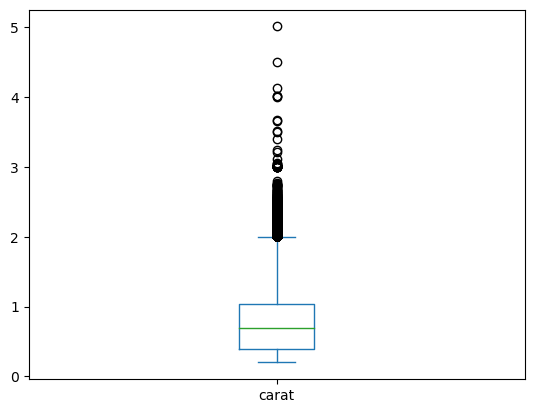

In [18]:
# Carat Column
df['carat'].plot.box()

<AxesSubplot:>

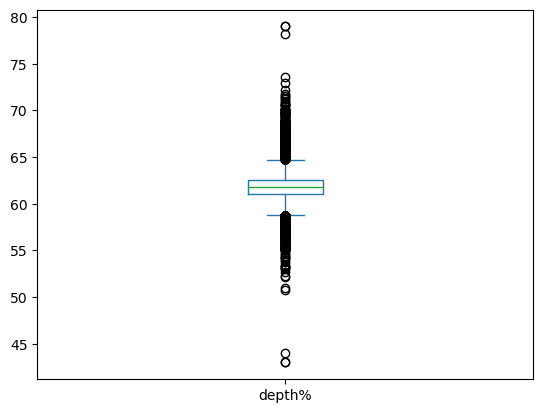

In [19]:
# Depth% Column
df['depth%'].plot.box()

<AxesSubplot:>

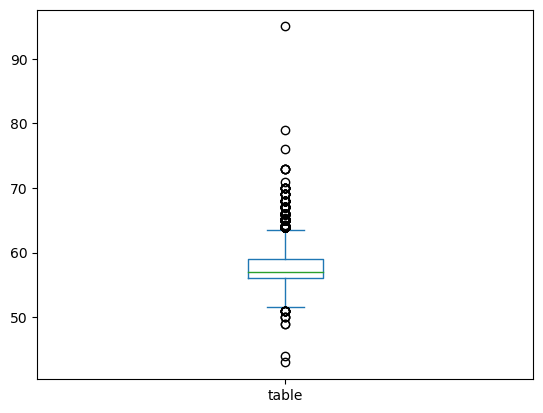

In [20]:
# Table Column
df['table'].plot.box()

<AxesSubplot:>

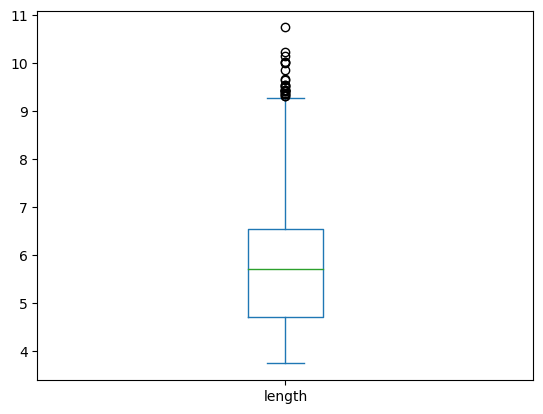

In [21]:
# Length Column
df['length'].plot.box()

<AxesSubplot:>

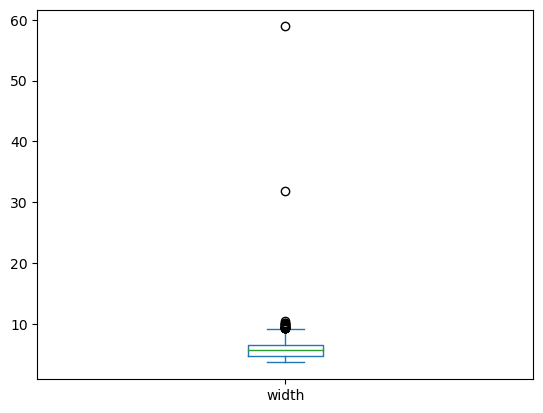

In [22]:
# Width Column
df['width'].plot.box()

<AxesSubplot:>

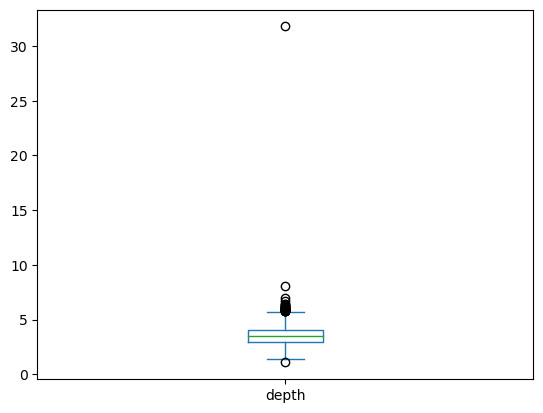

In [23]:
# Depth Column
df['depth'].plot.box()

<AxesSubplot:>

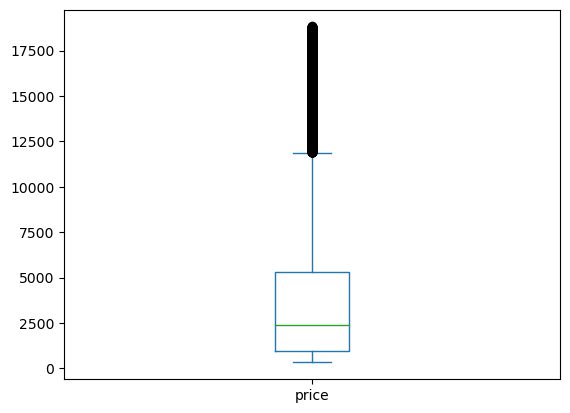

In [24]:
# Price Column
df['price'].plot.box()

### Univariate Analysis on Categorical Variable:

<AxesSubplot:>

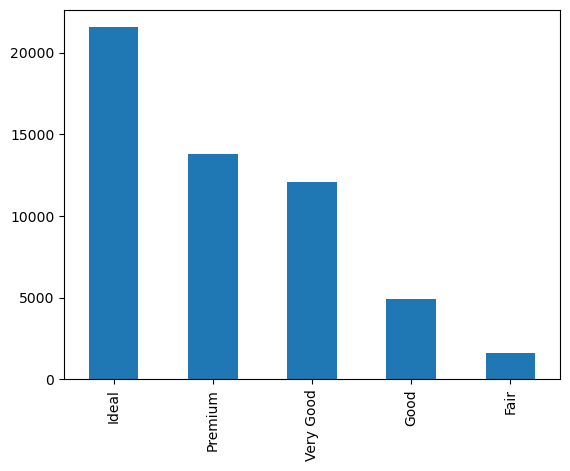

In [25]:
# BARPLOT for CUT
df['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:>

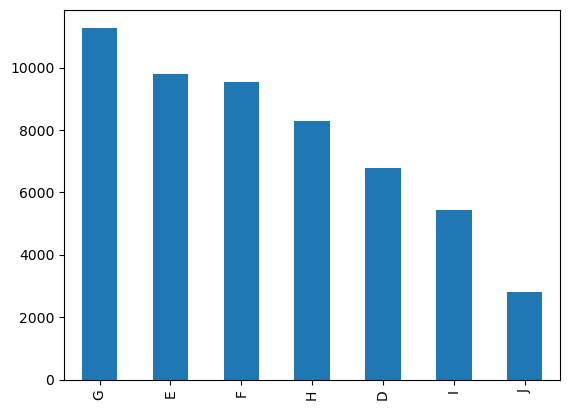

In [26]:
# BARPLOT for COLOR
df['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:>

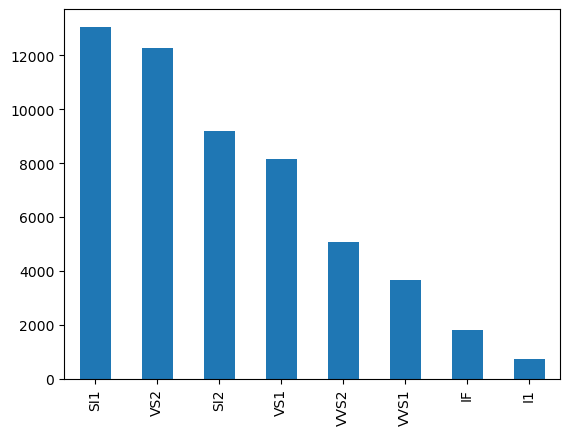

In [27]:
# BARPLOT for CLARITY
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

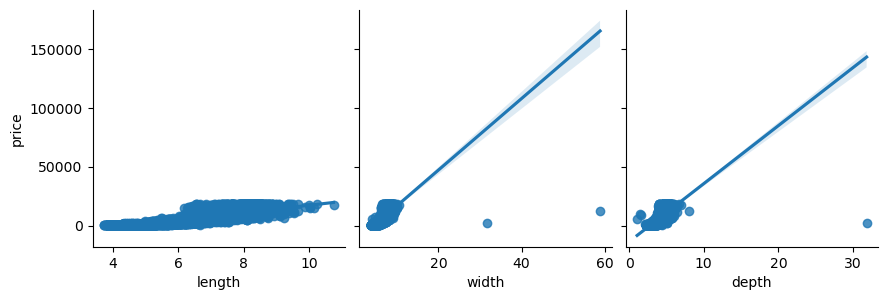

In [28]:
# Pairplot
sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

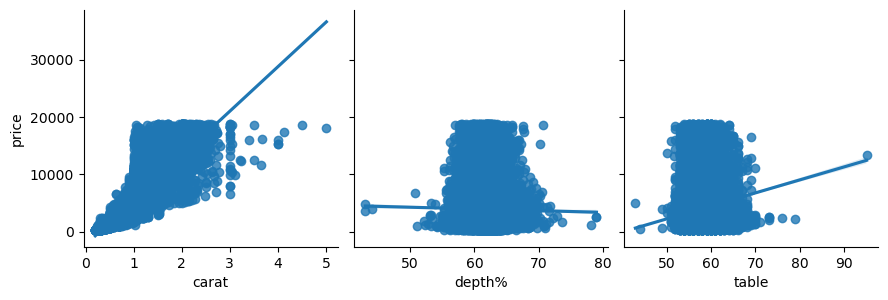

In [29]:
# Pairplot
sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

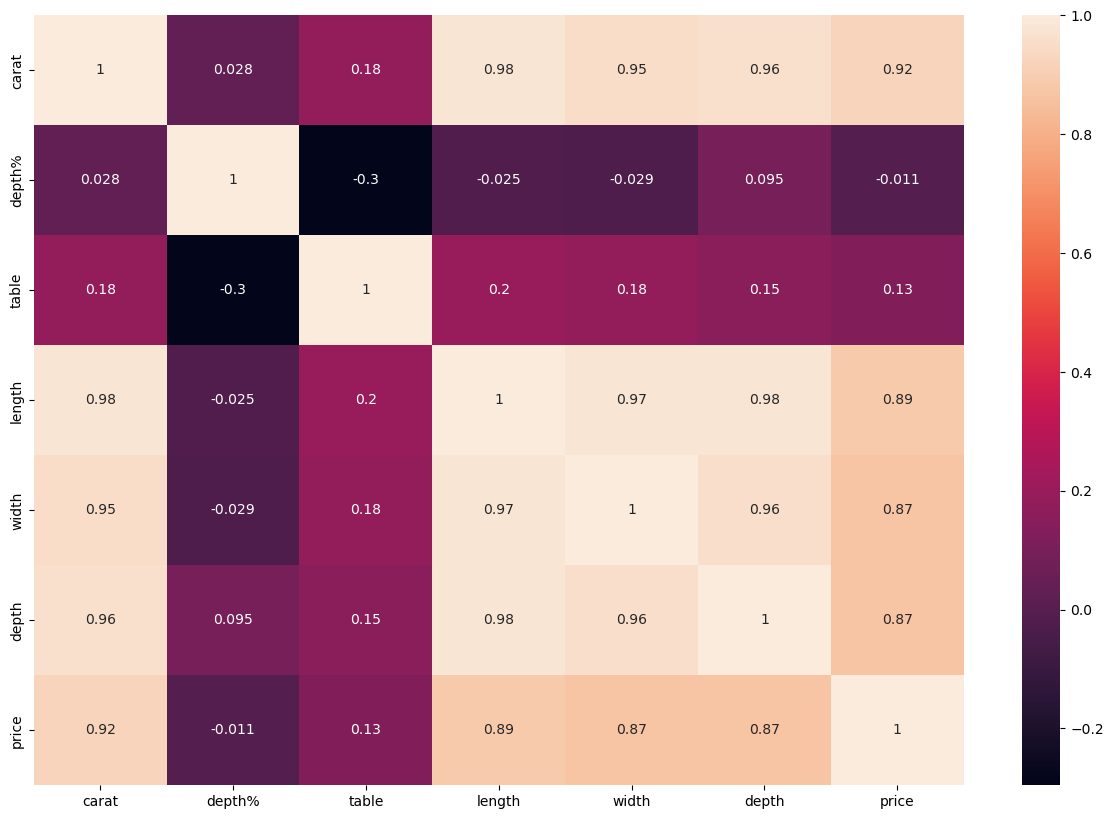

In [30]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

#### There is a high correlation between carat, length, width, depth and price.

### Bivariate Analysis on Categorical - Continous Variables:

<AxesSubplot:xlabel='cut'>

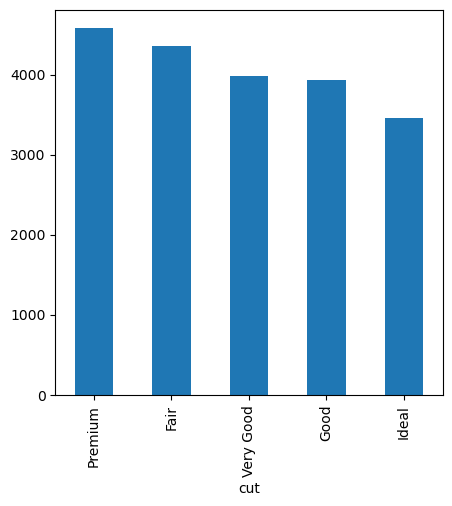

In [31]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:xlabel='color'>

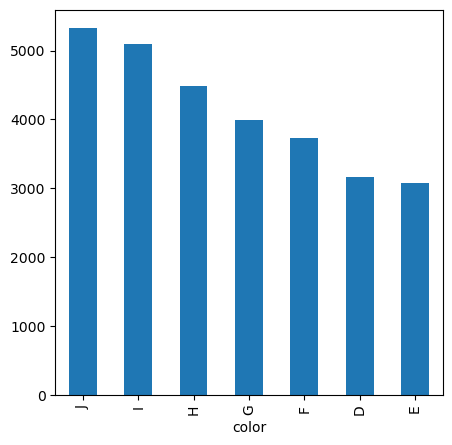

In [32]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:xlabel='clarity'>

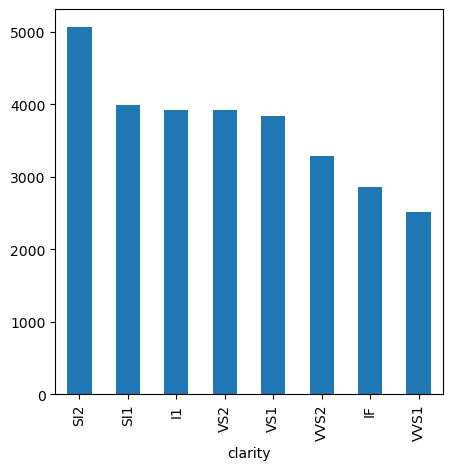

In [33]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

#### Splitting the Target and Independent Columns

In [34]:
X = df[['carat', 'cut', 'color', 'clarity', 'length', 'width', 'depth']]  #.drop('price', axis = 1)

In [35]:
y = df[['price']]

In [36]:
X.head()

,carat,cut,color,clarity,length,width,depth
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [37]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


### Splitting Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40440, 7) (40440, 1)
Test Set:  (13480, 7) (13480, 1)


In [39]:
X_train.head()

,carat,cut,color,clarity,length,width,depth
43315,0.38,Ideal,E,IF,4.68,4.74,2.89
26723,0.32,Good,F,VS2,4.32,4.36,2.75
26574,1.74,Very Good,D,SI1,7.74,7.79,4.81
52024,0.53,Ideal,F,IF,5.20,5.19,3.24
47932,0.56,Premium,E,VS2,5.31,5.28,3.25


In [40]:
X_test.head()

,carat,cut,color,clarity,length,width,depth
40846,0.46,Premium,E,VS2,5.10,5.05,2.97
51368,0.73,Premium,I,VS2,5.94,5.81,3.51
7306,0.91,Premium,F,SI1,6.24,6.20,3.86
26474,2.37,Ideal,J,VS2,8.52,8.58,5.32
17963,1.00,Very Good,G,VVS2,6.39,6.44,3.88


### Label Encoding

In [41]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

In [42]:
# label encoding the train set categorical columns
le = LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [43]:
# label encoding the test set categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

In [44]:
X_train.head()

,carat,cut,color,clarity,length,width,depth
43315,0.38,2,1,1,4.68,4.74,2.89
26723,0.32,1,2,5,4.32,4.36,2.75
26574,1.74,4,0,2,7.74,7.79,4.81
52024,0.53,2,2,1,5.20,5.19,3.24
47932,0.56,3,1,5,5.31,5.28,3.25


In [45]:
X_test.head()

,carat,cut,color,clarity,length,width,depth
40846,0.46,3,1,5,5.10,5.05,2.97
51368,0.73,3,5,5,5.94,5.81,3.51
7306,0.91,3,2,2,6.24,6.20,3.86
26474,2.37,2,6,5,8.52,8.58,5.32
17963,1.00,4,3,7,6.39,6.44,3.88


### Standardization

#### Data Pre-processing on Training Data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,length,width,depth
43315,-0.882002,-0.534139,-0.937298,-1.645256,-0.939806,-0.871135,-0.920850
26723,-1.008361,-1.508234,-0.350344,0.674563,-1.260776,-1.203224,-1.118793
26574,1.982135,1.414052,-1.524252,-1.065301,1.788446,1.794318,1.793804
52024,-0.566105,-0.534139,-0.350344,-1.645256,-0.476181,-0.477871,-0.425991
47932,-0.502925,0.439957,-0.937298,0.674563,-0.378107,-0.399218,-0.411852


#### Data Pre-processing on Testing Data

In [47]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,length,width,depth
40846,-0.713524,0.439957,-0.937298,0.674563,-0.565340,-0.600220,-0.807739
51368,-0.144908,0.439957,1.410518,0.674563,0.183592,0.063959,-0.044243
7306,0.234169,0.439957,-0.350344,-1.065301,0.451068,0.404787,0.450616
26474,3.308904,-0.534139,1.997472,0.674563,2.483882,2.484714,2.514884
17963,0.423707,1.414052,0.236610,1.834472,0.584805,0.614528,0.478894


### Creating Models and Running the Experiments

In [48]:
import mlflow

In [49]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', creation_time=1663698186431, experiment_id='1', last_update_time=1663698186431, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [50]:
from pickle import dump

dump(le, open('models/label_encoder.pkl', 'wb'))
dump(scaler, open('models/standard_scaler.pkl', 'wb'))

In [51]:
from sklearn import metrics

#### Experiment 1 - Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
with mlflow.start_run():
    mlflow.set_tag("test", "Rohit13")
    mlflow.set_tag("algo", "Linear Regression")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = linear_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(linear_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

#### Experiment 2 - KNN Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
with mlflow.start_run():
    mlflow.set_tag("test", "Rohit13")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    k = 5
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = knn_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(knn_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

#### Experiment 3 - Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
with mlflow.start_run():
    mlflow.set_tag("test", "Rohit13")
    mlflow.set_tag("algo", "Decision Tree Regression")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    d = None
    dt_regressor = DecisionTreeRegressor(max_depth = d)
    dt_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = dt_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("max_depth", d)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(dt_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

#### Experiment 4 - Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
with mlflow.start_run():
    mlflow.set_tag("test", "Rohit13")
    mlflow.set_tag("algo", "Random Forest Regression")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    e = 100
    rf_regressor = RandomForestRegressor(n_estimators = e)
    rf_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = rf_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("n_estimators", e)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(rf_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

#### Experiment 5 - Decision Tree Regression with Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs = None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 'p': [1, 2]}]
    
    gs = GridSearchCV(
        estimator = KNeighborsRegressor(),
        param_grid = tuned_parameters,
        scoring = 'neg_mean_squared_error',
        cv = 5,
        return_train_score = True,
        verbose = 1
    )
    gs.fit(X_train_rescaled, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable = True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [62]:
with mlflow.start_run():
    mlflow.set_tag("test", "Rohit13")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    k = 3
    p = 2
    knn_regressor = KNeighborsRegressor(n_neighbors = k, p = p)
    knn_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = knn_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("p", p)
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(knn_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

#### Therefore, the accuracy of the Random Forest Regression model is higher compared to the other models.
#### But we will not be using Random Forest Regression Model due to the large file size. Instead we will use KNN Regression Model which gave the second best scores.